In [1]:
import numpy             as np
import pandas            as pd
import geopandas         as gpd
import seaborn           as sns
import matplotlib.pyplot as plt
from shapely import geometry

In [129]:
path_data       = r"../raw_data/"
path_temp_media = path_data + r"temperatura/mean/"
path_temp_max   = path_data + r"temperatura/max/"
path_temp_min   = path_data + r"temperatura/min/"
path_lluvia     = path_data + r"lluvia/"
path_ind_UV     = path_data + r"indice_UV/"
path_hum_9      = path_data + r"humedad_relativa/hora9/"
path_hum_15     = path_data + r"humedad_relativa/hora15/"
path_expo_sol   = path_data + r"expo_sol/"
path_evotrans   = path_data + r"evapotranspiracion/"
path_evap       = path_data + r"evaporacion/"
path_dias_sol   = path_data + r"dias_sol/"
path_dias_lluv  = path_data + r"dias_lluvia/"
path_dias_helad = path_data + r"dias_helada/"

path_shape_data = "../geo_data/pre/"
path_shape_data_temp = "../geo_data/temp/clima_australia.shp" # Guardados temporary
path_shape_data_final = "../geo_data/final/clima_australia.shp"
path_csv_data_final = "../csv_data/clima_australia.csv"

na_val = -9999

In [19]:
df_clima = gpd.read_file(path_shape_data)
df_clima = (
    df_clima.rename(columns={
        'temp_jan':'meanjan'
    })
)
df_clima.geometry = df_clima.geometry.scale(5, 5, origin=(112, -44))
df_clima['centroids'] = df_clima.geometry.centroid

### Añadir todas las temperaturas:

In [111]:
def data(path, name):
    df = pd.read_csv(
                path+name+".txt",
                sep=" ",
                skiprows=6,
                header=None).iloc[:,:-1].replace(to_replace={na_val:np.nan})
    return df

def add_data(path, name, t_x_corner, t_y_corner, t_cellsize, centroids):
    df = data(path, name)
    ncols_out = 336
    nrows_out = 272
    scaledown_row = round(df.shape[0]/nrows_out,6)
    scaledown_col = round(df.shape[1]/ncols_out,6)
    n_col = df.shape[1]-1
    num_total = len(centroids)
    x_inf = t_x_corner
    y_inf = t_y_corner
    x_sup = t_x_corner+df.shape[1]*t_cellsize
    y_sup = t_y_corner+df.shape[0]*t_cellsize
    
    i=0
    df_salida = pd.DataFrame()
    for c in centroids:
        print("\r", str(round(100*i/num_total))+'%', end=" ")
        x  = c.x # Columna
        y  = c.y # Fila
        cl = round(n_col - (x_sup-x)/t_cellsize)
        rw = round((y_sup-y)/t_cellsize)
        # try:
        #     val = df.iloc[rw,cl]
        # except:
        #     val = np.nan
        val = df.iloc[rw,cl]
        df_salida = df_salida.append({name:val}, ignore_index=True)
        i+=1
    print('\n')
    return df_salida

### IMPORT: Temperaturas medias

In [33]:
df_clima['meanfeb'] = add_data(path_temp_media,'meanfeb',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meanmar'] = add_data(path_temp_media,'meanmar',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meanapr'] = add_data(path_temp_media,'meanapr',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meanmay'] = add_data(path_temp_media,'meanmay',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meanjun'] = add_data(path_temp_media,'meanjun',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meanjul'] = add_data(path_temp_media,'meanjul',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meanaug'] = add_data(path_temp_media,'meanaug',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meansep'] = add_data(path_temp_media,'meansep',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meanoct'] = add_data(path_temp_media,'meanoct',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meannov'] = add_data(path_temp_media,'meannov',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['meandec'] = add_data(path_temp_media,'meandec',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')

 100% 

 100% 

 100% 5% 

 100%  9% 43% 

 100%  47% 68% 98% 

 100% 6% 

 100% 8% 56% 78% 

 100%  

 100% 2% 66% 

 100% 

 100%   



### Representacion de Temp. Medias: 

Text(0.5, 1.0, 'Diciembre')

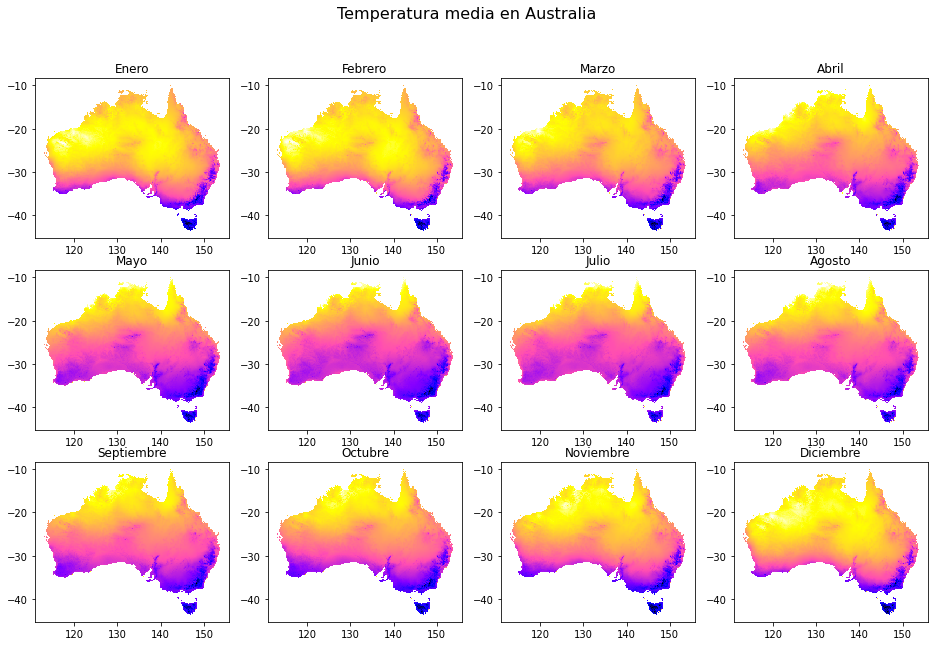

In [34]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Temperatura media en Australia', fontsize=16)

df_clima.plot(column='meanjan',ax=axes[0,0],cmap='gnuplot2'); axes[0,0].set_title('Enero')
df_clima.plot(column='meanfeb',ax=axes[0,1],cmap='gnuplot2'); axes[0,1].set_title('Febrero')
df_clima.plot(column='meanmar',ax=axes[0,2],cmap='gnuplot2'); axes[0,2].set_title('Marzo')
df_clima.plot(column='meanapr',ax=axes[0,3],cmap='gnuplot2'); axes[0,3].set_title('Abril')
df_clima.plot(column='meanmay',ax=axes[1,0],cmap='gnuplot2'); axes[1,0].set_title('Mayo')
df_clima.plot(column='meanjun',ax=axes[1,1],cmap='gnuplot2'); axes[1,1].set_title('Junio')
df_clima.plot(column='meanjul',ax=axes[1,2],cmap='gnuplot2'); axes[1,2].set_title('Julio')
df_clima.plot(column='meanaug',ax=axes[1,3],cmap='gnuplot2'); axes[1,3].set_title('Agosto')
df_clima.plot(column='meansep',ax=axes[2,0],cmap='gnuplot2'); axes[2,0].set_title('Septiembre')
df_clima.plot(column='meanoct',ax=axes[2,1],cmap='gnuplot2'); axes[2,1].set_title('Octubre')
df_clima.plot(column='meannov',ax=axes[2,2],cmap='gnuplot2'); axes[2,2].set_title('Noviembre')
df_clima.plot(column='meandec',ax=axes[2,3],cmap='gnuplot2'); axes[2,3].set_title('Diciembre')

### IMPORT: Temperaturas maximas y mínimas

In [41]:
# Maximas:
print('Importando datos de temp. máxima:\n')
df_clima['maxjan'] = add_data(path_temp_max,'maxjan',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxfeb'] = add_data(path_temp_max,'maxfeb',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxmar'] = add_data(path_temp_max,'maxmar',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxapr'] = add_data(path_temp_max,'maxapr',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxmay'] = add_data(path_temp_max,'maxmay',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxjun'] = add_data(path_temp_max,'maxjun',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxjul'] = add_data(path_temp_max,'maxjul',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxaug'] = add_data(path_temp_max,'maxaug',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxsep'] = add_data(path_temp_max,'maxsep',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxoct'] = add_data(path_temp_max,'maxoct',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxnov'] = add_data(path_temp_max,'maxnov',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['maxdec'] = add_data(path_temp_max,'maxdec',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')

#Minimas
print('Importando datos de temp. mínima:\n')
df_clima['minjan'] = add_data(path_temp_min,'minjan',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minfeb'] = add_data(path_temp_min,'minfeb',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minmar'] = add_data(path_temp_min,'minmar',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minapr'] = add_data(path_temp_min,'minapr',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minmay'] = add_data(path_temp_min,'minmay',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minjun'] = add_data(path_temp_min,'minjun',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minjul'] = add_data(path_temp_min,'minjul',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minaug'] = add_data(path_temp_min,'minaug',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minsep'] = add_data(path_temp_min,'minsep',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minoct'] = add_data(path_temp_min,'minoct',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['minnov'] = add_data(path_temp_min,'minnov',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')
df_clima['mindec'] = add_data(path_temp_min,'mindec',112, -44, 0.025, df_clima.centroids).fillna(method='ffill')

Importando datos de temp. máxima:

 100% 7% 55% 

 100% 7% 66% 67% 

 100% 9% 

 100%  2% 

 100%   

 100%  26% 

 100% 

 100% 

 100% 

 100%  67% 

 100%  6% 65% 86% 

 100%  35% 93% 

Importando datos de temp. mínima:

 100%  9% 33% 

 100% 

 100% 9% 

 100%  45% 

 100% 5%   

 100% 

 100% 2%  41% 42% 57% 

 100% 

 100% 6% 68%  85% 

 100% 5% 

 100% 3% 

 100% 



### Representación de Temperaturas Máximas y Mínimas

Text(0.5, 1.0, 'Diciembre')

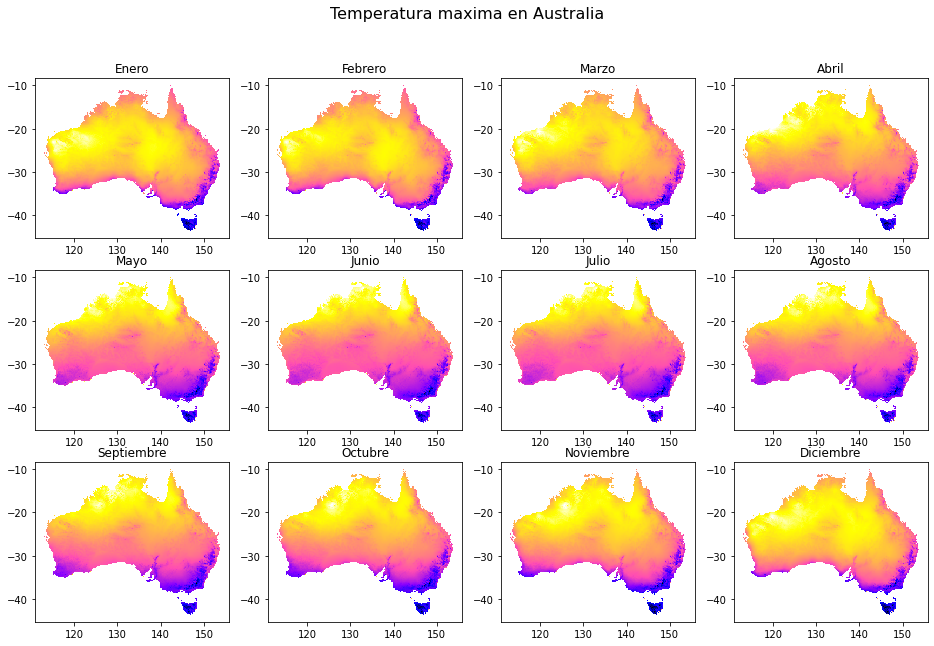

In [44]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Temperatura maxima en Australia', fontsize=16)

df_clima.plot(column='maxjan',ax=axes[0,0],cmap='gnuplot2'); axes[0,0].set_title('Enero')
df_clima.plot(column='maxfeb',ax=axes[0,1],cmap='gnuplot2'); axes[0,1].set_title('Febrero')
df_clima.plot(column='maxmar',ax=axes[0,2],cmap='gnuplot2'); axes[0,2].set_title('Marzo')
df_clima.plot(column='maxapr',ax=axes[0,3],cmap='gnuplot2'); axes[0,3].set_title('Abril')
df_clima.plot(column='maxmay',ax=axes[1,0],cmap='gnuplot2'); axes[1,0].set_title('Mayo')
df_clima.plot(column='maxjun',ax=axes[1,1],cmap='gnuplot2'); axes[1,1].set_title('Junio')
df_clima.plot(column='maxjul',ax=axes[1,2],cmap='gnuplot2'); axes[1,2].set_title('Julio')
df_clima.plot(column='maxaug',ax=axes[1,3],cmap='gnuplot2'); axes[1,3].set_title('Agosto')
df_clima.plot(column='maxsep',ax=axes[2,0],cmap='gnuplot2'); axes[2,0].set_title('Septiembre')
df_clima.plot(column='maxoct',ax=axes[2,1],cmap='gnuplot2'); axes[2,1].set_title('Octubre')
df_clima.plot(column='maxnov',ax=axes[2,2],cmap='gnuplot2'); axes[2,2].set_title('Noviembre')
df_clima.plot(column='maxdec',ax=axes[2,3],cmap='gnuplot2'); axes[2,3].set_title('Diciembre')

Text(0.5, 1.0, 'Diciembre')

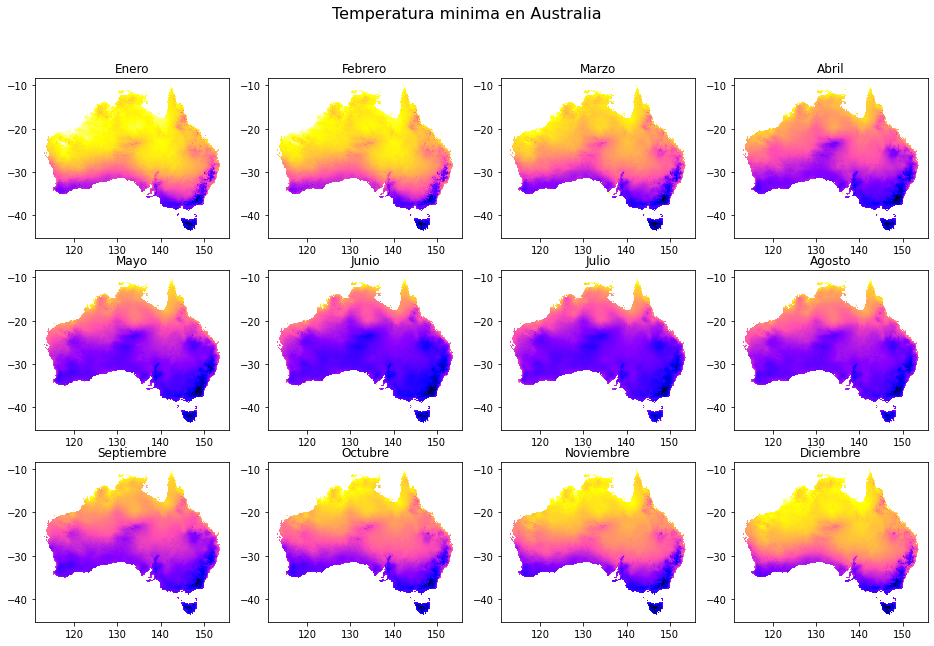

In [45]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Temperatura minima en Australia', fontsize=16)

df_clima.plot(column='minjan',ax=axes[0,0],cmap='gnuplot2'); axes[0,0].set_title('Enero')
df_clima.plot(column='minfeb',ax=axes[0,1],cmap='gnuplot2'); axes[0,1].set_title('Febrero')
df_clima.plot(column='minmar',ax=axes[0,2],cmap='gnuplot2'); axes[0,2].set_title('Marzo')
df_clima.plot(column='minapr',ax=axes[0,3],cmap='gnuplot2'); axes[0,3].set_title('Abril')
df_clima.plot(column='minmay',ax=axes[1,0],cmap='gnuplot2'); axes[1,0].set_title('Mayo')
df_clima.plot(column='minjun',ax=axes[1,1],cmap='gnuplot2'); axes[1,1].set_title('Junio')
df_clima.plot(column='minjul',ax=axes[1,2],cmap='gnuplot2'); axes[1,2].set_title('Julio')
df_clima.plot(column='minaug',ax=axes[1,3],cmap='gnuplot2'); axes[1,3].set_title('Agosto')
df_clima.plot(column='minsep',ax=axes[2,0],cmap='gnuplot2'); axes[2,0].set_title('Septiembre')
df_clima.plot(column='minoct',ax=axes[2,1],cmap='gnuplot2'); axes[2,1].set_title('Octubre')
df_clima.plot(column='minnov',ax=axes[2,2],cmap='gnuplot2'); axes[2,2].set_title('Noviembre')
df_clima.plot(column='mindec',ax=axes[2,3],cmap='gnuplot2'); axes[2,3].set_title('Diciembre')

### Guardado de datos de temperatura

In [81]:
df_clima.drop(columns=['centroids']).to_file(path_shape_data_temp)

### IMPORT: Días de helada anual

In [47]:
df_clima['frostann'] = add_data(path_dias_helad,'frostann',111.975, -44.525, 0.05, df_clima.centroids).fillna(method='ffill')

 100% 



Text(0.5, 1.0, 'Días de helada anuales')

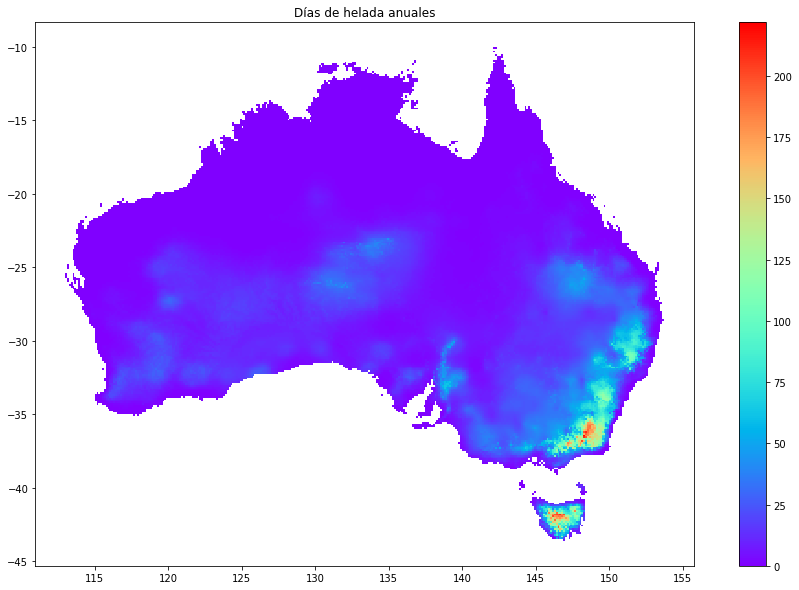

In [67]:
fig,ax = plt.subplots(figsize=(16,10))

plot = df_clima.plot(column='frostann',ax=ax,cmap='rainbow', vmin=0, legend=True)
ax.set_title('Días de helada anuales')

### IMPORT: Días de lluvia

In [68]:
df_clima['rndiasjan'] = add_data(path_dias_lluv,'rndy1jan',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasfeb'] = add_data(path_dias_lluv,'rndy1feb',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasmar'] = add_data(path_dias_lluv,'rndy1mar',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasapr'] = add_data(path_dias_lluv,'rndy1apr',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasmay'] = add_data(path_dias_lluv,'rndy1may',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasjun'] = add_data(path_dias_lluv,'rndy1jun',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasjul'] = add_data(path_dias_lluv,'rndy1jul',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasaug'] = add_data(path_dias_lluv,'rndy1aug',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiassep'] = add_data(path_dias_lluv,'rndy1sep',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasoct'] = add_data(path_dias_lluv,'rndy1oct',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasnov'] = add_data(path_dias_lluv,'rndy1nov',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rndiasdec'] = add_data(path_dias_lluv,'rndy1dec',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')

 100% 8% 

 100% 

 100% 

 100%  20% 

 100% 4% 35% 60% 84% 

 100% 2% 

 100% 5% 

 100% 8% 34% 53% 74% 94%  

 100%  

 100% 

 100% 

 100% 6% 84% 



Text(0.5, 1.0, 'Diciembre')

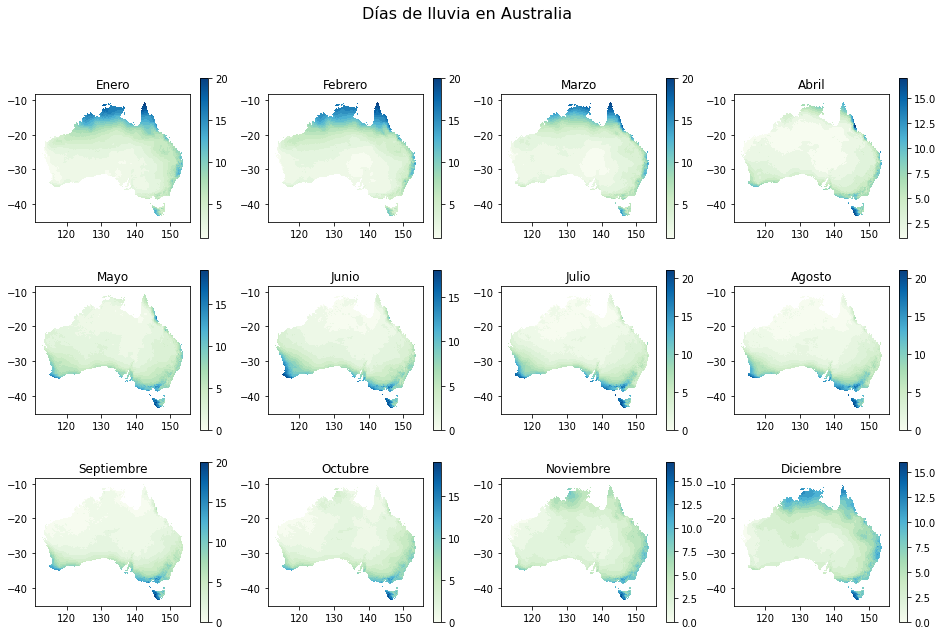

In [73]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Días de lluvia en Australia', fontsize=16)

df_clima.plot(column='rndiasjan',ax=axes[0,0],cmap='GnBu', legend=True); axes[0,0].set_title('Enero')
df_clima.plot(column='rndiasfeb',ax=axes[0,1],cmap='GnBu', legend=True); axes[0,1].set_title('Febrero')
df_clima.plot(column='rndiasmar',ax=axes[0,2],cmap='GnBu', legend=True); axes[0,2].set_title('Marzo')
df_clima.plot(column='rndiasapr',ax=axes[0,3],cmap='GnBu', legend=True); axes[0,3].set_title('Abril')
df_clima.plot(column='rndiasmay',ax=axes[1,0],cmap='GnBu', legend=True); axes[1,0].set_title('Mayo')
df_clima.plot(column='rndiasjun',ax=axes[1,1],cmap='GnBu', legend=True); axes[1,1].set_title('Junio')
df_clima.plot(column='rndiasjul',ax=axes[1,2],cmap='GnBu', legend=True); axes[1,2].set_title('Julio')
df_clima.plot(column='rndiasaug',ax=axes[1,3],cmap='GnBu', legend=True); axes[1,3].set_title('Agosto')
df_clima.plot(column='rndiassep',ax=axes[2,0],cmap='GnBu', legend=True); axes[2,0].set_title('Septiembre')
df_clima.plot(column='rndiasoct',ax=axes[2,1],cmap='GnBu', legend=True); axes[2,1].set_title('Octubre')
df_clima.plot(column='rndiasnov',ax=axes[2,2],cmap='GnBu', legend=True); axes[2,2].set_title('Noviembre')
df_clima.plot(column='rndiasdec',ax=axes[2,3],cmap='GnBu', legend=True); axes[2,3].set_title('Diciembre')

### IMPORT: Horas de sol diarias

In [74]:
df_clima['sunjan'] = add_data(path_dias_sol,'sunjan',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunfeb'] = add_data(path_dias_sol,'sunfeb',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunmar'] = add_data(path_dias_sol,'sunmar',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunapr'] = add_data(path_dias_sol,'sunapr',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunmay'] = add_data(path_dias_sol,'sunmay',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunjun'] = add_data(path_dias_sol,'sunjun',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunjul'] = add_data(path_dias_sol,'sunjul',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunaug'] = add_data(path_dias_sol,'sunaug',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunsep'] = add_data(path_dias_sol,'sunsep',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunoct'] = add_data(path_dias_sol,'sunoct',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sunnov'] = add_data(path_dias_sol,'sunnov',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['sundec'] = add_data(path_dias_sol,'sundec',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')

 100% 3% 72% 

 100% 6% 95% 

 100% 

 100% 4% 

 100% 7% 70% 

 100% 2% 

 100% 4% 

 100% 

 100%  65% 

 100% 

 100% 

 100%  9%  79% 



Text(0.5, 1.0, 'Diciembre')

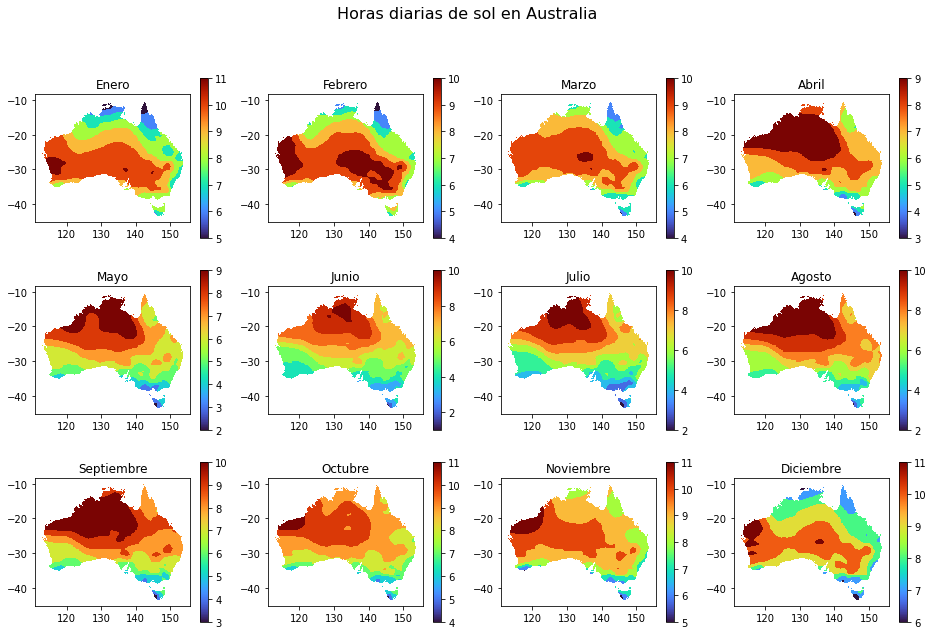

In [79]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Horas diarias de sol en Australia', fontsize=16)

df_clima.plot(column='sunjan',ax=axes[0,0],cmap='turbo', legend=True); axes[0,0].set_title('Enero')
df_clima.plot(column='sunfeb',ax=axes[0,1],cmap='turbo', legend=True); axes[0,1].set_title('Febrero')
df_clima.plot(column='sunmar',ax=axes[0,2],cmap='turbo', legend=True); axes[0,2].set_title('Marzo')
df_clima.plot(column='sunapr',ax=axes[0,3],cmap='turbo', legend=True); axes[0,3].set_title('Abril')
df_clima.plot(column='sunmay',ax=axes[1,0],cmap='turbo', legend=True); axes[1,0].set_title('Mayo')
df_clima.plot(column='sunjun',ax=axes[1,1],cmap='turbo', legend=True); axes[1,1].set_title('Junio')
df_clima.plot(column='sunjul',ax=axes[1,2],cmap='turbo', legend=True); axes[1,2].set_title('Julio')
df_clima.plot(column='sunaug',ax=axes[1,3],cmap='turbo', legend=True); axes[1,3].set_title('Agosto')
df_clima.plot(column='sunsep',ax=axes[2,0],cmap='turbo', legend=True); axes[2,0].set_title('Septiembre')
df_clima.plot(column='sunoct',ax=axes[2,1],cmap='turbo', legend=True); axes[2,1].set_title('Octubre')
df_clima.plot(column='sunnov',ax=axes[2,2],cmap='turbo', legend=True); axes[2,2].set_title('Noviembre')
df_clima.plot(column='sundec',ax=axes[2,3],cmap='turbo', legend=True); axes[2,3].set_title('Diciembre')

### IMPORT: Evaporación

In [82]:
df_clima['evapjan'] = add_data(path_evap,'evapjan',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapfeb'] = add_data(path_evap,'evapfeb',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapmar'] = add_data(path_evap,'evapmar',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapapr'] = add_data(path_evap,'evapapr',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapmay'] = add_data(path_evap,'evapmay',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapjun'] = add_data(path_evap,'evapjun',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapjul'] = add_data(path_evap,'evapjul',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapaug'] = add_data(path_evap,'evapaug',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapsep'] = add_data(path_evap,'evapsep',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapoct'] = add_data(path_evap,'evapoct',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapnov'] = add_data(path_evap,'evapnov',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')
df_clima['evapdec'] = add_data(path_evap,'evapdec',111.875, -44.625, 0.25, df_clima.centroids).fillna(method='ffill')

 100% 5% 

 100% 

 100% 

 100%  

 100%  1% 83% 

 100% 6% 

 100% 1% 18% 

 100% 

 100% % 10%  92% 

 100%  5%  89% 90% 

 100% 

 100%  12% 57% 



Text(0.5, 1.0, 'Diciembre')

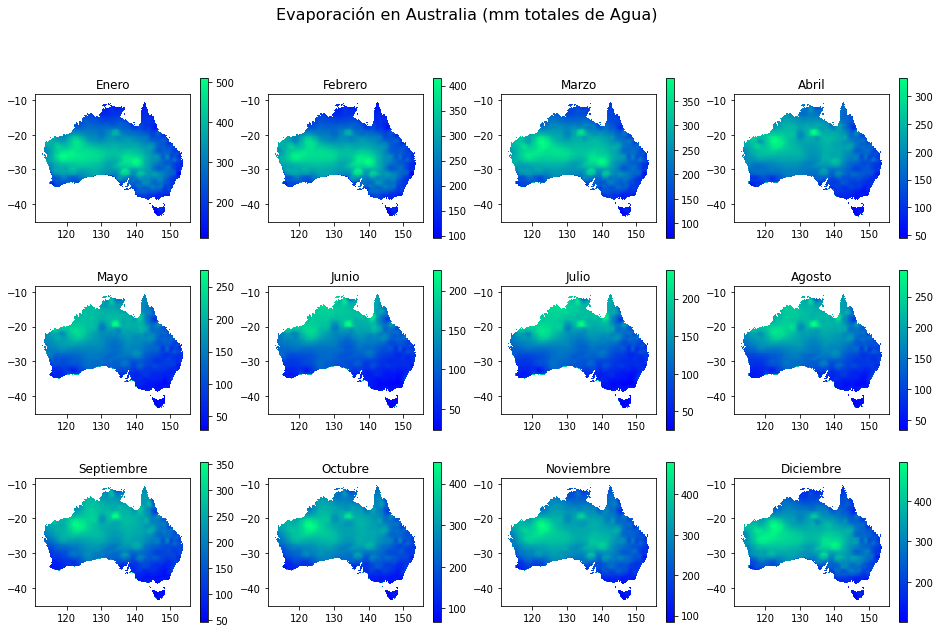

In [84]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Evaporación en Australia (mm totales de Agua)', fontsize=16)

df_clima.plot(column='evapjan',ax=axes[0,0],cmap='winter', legend=True); axes[0,0].set_title('Enero')
df_clima.plot(column='evapfeb',ax=axes[0,1],cmap='winter', legend=True); axes[0,1].set_title('Febrero')
df_clima.plot(column='evapmar',ax=axes[0,2],cmap='winter', legend=True); axes[0,2].set_title('Marzo')
df_clima.plot(column='evapapr',ax=axes[0,3],cmap='winter', legend=True); axes[0,3].set_title('Abril')
df_clima.plot(column='evapmay',ax=axes[1,0],cmap='winter', legend=True); axes[1,0].set_title('Mayo')
df_clima.plot(column='evapjun',ax=axes[1,1],cmap='winter', legend=True); axes[1,1].set_title('Junio')
df_clima.plot(column='evapjul',ax=axes[1,2],cmap='winter', legend=True); axes[1,2].set_title('Julio')
df_clima.plot(column='evapaug',ax=axes[1,3],cmap='winter', legend=True); axes[1,3].set_title('Agosto')
df_clima.plot(column='evapsep',ax=axes[2,0],cmap='winter', legend=True); axes[2,0].set_title('Septiembre')
df_clima.plot(column='evapoct',ax=axes[2,1],cmap='winter', legend=True); axes[2,1].set_title('Octubre')
df_clima.plot(column='evapnov',ax=axes[2,2],cmap='winter', legend=True); axes[2,2].set_title('Noviembre')
df_clima.plot(column='evapdec',ax=axes[2,3],cmap='winter', legend=True); axes[2,3].set_title('Diciembre')

### IMPORT: Evotranspiración

In [85]:
df_clima['etaajan'] = add_data(path_evotrans,'etaajan',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaafeb'] = add_data(path_evotrans,'etaafeb',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaamar'] = add_data(path_evotrans,'etaamar',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaaapr'] = add_data(path_evotrans,'etaaapr',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaamay'] = add_data(path_evotrans,'etaamay',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaajun'] = add_data(path_evotrans,'etaajun',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaajul'] = add_data(path_evotrans,'etaajul',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaaaug'] = add_data(path_evotrans,'etaaaug',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaasep'] = add_data(path_evotrans,'etaasep',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaaoct'] = add_data(path_evotrans,'etaaoct',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaanov'] = add_data(path_evotrans,'etaanov',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['etaadec'] = add_data(path_evotrans,'etaadec',112.15, -43.8, 0.1, df_clima.centroids).fillna(method='ffill')

 100% 

 100% 9% 

 100% 

 100% 3% 

 100% 1% 28% 30% 32% 34% 

 100%  11% 

 100% 

 100% 

 100% % 

 100% 

 100% 3% 

 100% 5% 97% 



Text(0.5, 1.0, 'Diciembre')

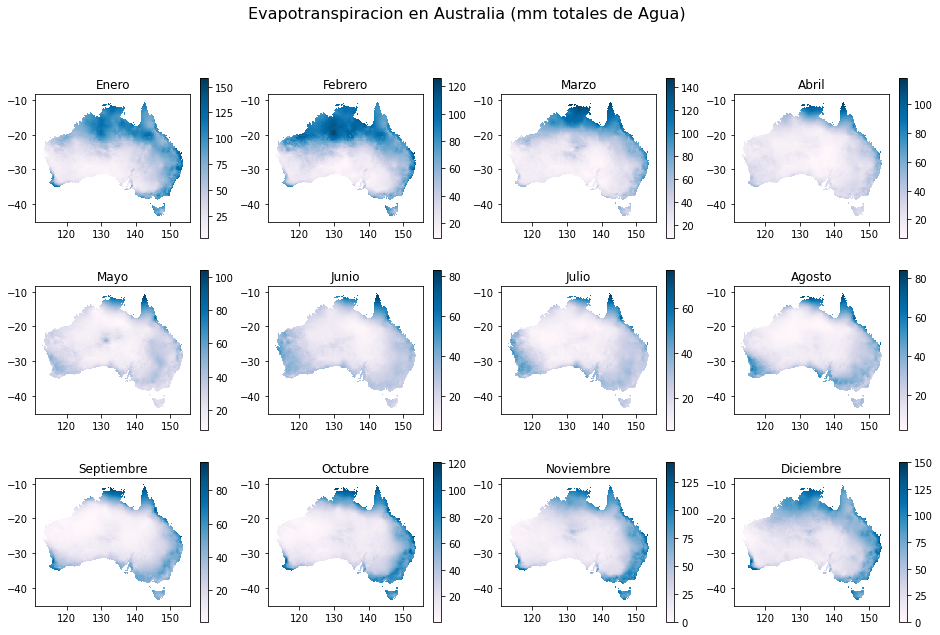

In [86]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Evapotranspiracion en Australia (mm totales de Agua)', fontsize=16)

df_clima.plot(column='etaajan',ax=axes[0,0],cmap='PuBu', legend=True); axes[0,0].set_title('Enero')
df_clima.plot(column='etaafeb',ax=axes[0,1],cmap='PuBu', legend=True); axes[0,1].set_title('Febrero')
df_clima.plot(column='etaamar',ax=axes[0,2],cmap='PuBu', legend=True); axes[0,2].set_title('Marzo')
df_clima.plot(column='etaaapr',ax=axes[0,3],cmap='PuBu', legend=True); axes[0,3].set_title('Abril')
df_clima.plot(column='etaamay',ax=axes[1,0],cmap='PuBu', legend=True); axes[1,0].set_title('Mayo')
df_clima.plot(column='etaajun',ax=axes[1,1],cmap='PuBu', legend=True); axes[1,1].set_title('Junio')
df_clima.plot(column='etaajul',ax=axes[1,2],cmap='PuBu', legend=True); axes[1,2].set_title('Julio')
df_clima.plot(column='etaaaug',ax=axes[1,3],cmap='PuBu', legend=True); axes[1,3].set_title('Agosto')
df_clima.plot(column='etaasep',ax=axes[2,0],cmap='PuBu', legend=True); axes[2,0].set_title('Septiembre')
df_clima.plot(column='etaaoct',ax=axes[2,1],cmap='PuBu', legend=True); axes[2,1].set_title('Octubre')
df_clima.plot(column='etaanov',ax=axes[2,2],cmap='PuBu', legend=True); axes[2,2].set_title('Noviembre')
df_clima.plot(column='etaadec',ax=axes[2,3],cmap='PuBu', legend=True); axes[2,3].set_title('Diciembre')

### Guardado de datos

In [87]:
df_clima.drop(columns=['centroids']).to_file(path_shape_data_temp)

### IMPORT: Exposición solar

In [89]:
df_clima['solarjan'] = add_data(path_expo_sol,'solarjan',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarfeb'] = add_data(path_expo_sol,'solarfeb',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarmar'] = add_data(path_expo_sol,'solarmar',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarapr'] = add_data(path_expo_sol,'solarapr',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarmay'] = add_data(path_expo_sol,'solarmay',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarjun'] = add_data(path_expo_sol,'solarjun',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarjul'] = add_data(path_expo_sol,'solarjul',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solaraug'] = add_data(path_expo_sol,'solaraug',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarsep'] = add_data(path_expo_sol,'solarsep',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solaroct'] = add_data(path_expo_sol,'solaroct',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solarnov'] = add_data(path_expo_sol,'solarnov',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')
df_clima['solardec'] = add_data(path_expo_sol,'solardec',112.025, -43.975, 0.049999999999997, df_clima.centroids).fillna(method='ffill')

 100% 4% 17% 27% 54% 

 100% 

 100%  25% 63% 63% 74% 77% 

 100%  16% 24% 29% 33% 39% 46% 

 100% 

 100% 9% 84% 

 100%  40% 63% 

 100% 30% 59% 

 100% 2% 42% 73% 80% 

 100% 

 100% 7% 93% 

 100% 3% 37% 64% 



Text(0.5, 1.0, 'Diciembre')

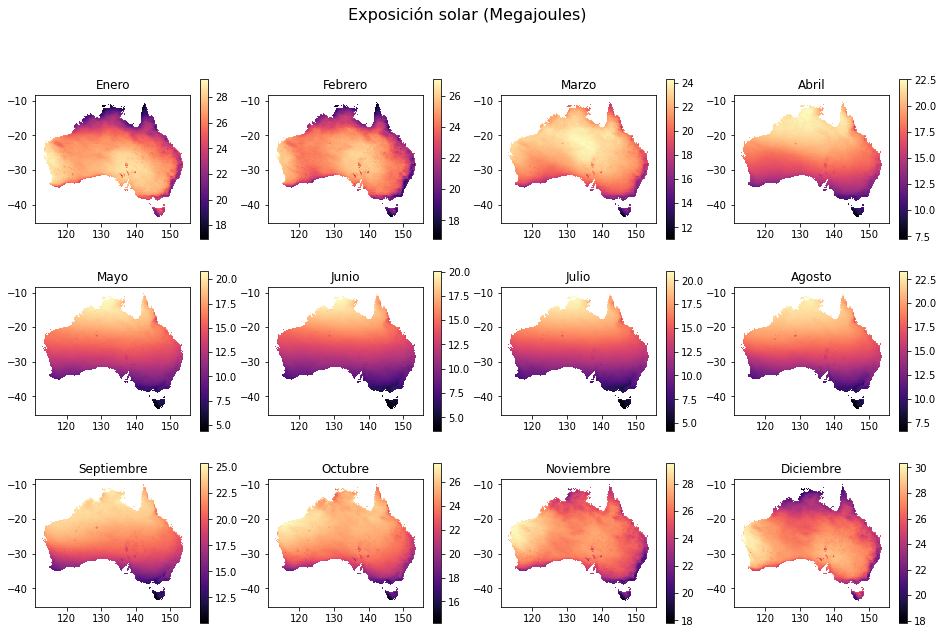

In [91]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Exposición solar (Megajoules)', fontsize=16)

df_clima.plot(column='solarjan',ax=axes[0,0],cmap='magma', legend=True); axes[0,0].set_title('Enero')
df_clima.plot(column='solarfeb',ax=axes[0,1],cmap='magma', legend=True); axes[0,1].set_title('Febrero')
df_clima.plot(column='solarmar',ax=axes[0,2],cmap='magma', legend=True); axes[0,2].set_title('Marzo')
df_clima.plot(column='solarapr',ax=axes[0,3],cmap='magma', legend=True); axes[0,3].set_title('Abril')
df_clima.plot(column='solarmay',ax=axes[1,0],cmap='magma', legend=True); axes[1,0].set_title('Mayo')
df_clima.plot(column='solarjun',ax=axes[1,1],cmap='magma', legend=True); axes[1,1].set_title('Junio')
df_clima.plot(column='solarjul',ax=axes[1,2],cmap='magma', legend=True); axes[1,2].set_title('Julio')
df_clima.plot(column='solaraug',ax=axes[1,3],cmap='magma', legend=True); axes[1,3].set_title('Agosto')
df_clima.plot(column='solarsep',ax=axes[2,0],cmap='magma', legend=True); axes[2,0].set_title('Septiembre')
df_clima.plot(column='solaroct',ax=axes[2,1],cmap='magma', legend=True); axes[2,1].set_title('Octubre')
df_clima.plot(column='solarnov',ax=axes[2,2],cmap='magma', legend=True); axes[2,2].set_title('Noviembre')
df_clima.plot(column='solardec',ax=axes[2,3],cmap='magma', legend=True); axes[2,3].set_title('Diciembre')

### IMPORT: Humedad Relativa

In [93]:
# Humedad relativa 9:00
df_clima['rh9jan'] = add_data(path_hum_9,'rh9jan',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9feb'] = add_data(path_hum_9,'rh9feb',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9mar'] = add_data(path_hum_9,'rh9mar',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9apr'] = add_data(path_hum_9,'rh9apr',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9may'] = add_data(path_hum_9,'rh9may',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9jun'] = add_data(path_hum_9,'rh9jun',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9jul'] = add_data(path_hum_9,'rh9jul',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9aug'] = add_data(path_hum_9,'rh9aug',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9sep'] = add_data(path_hum_9,'rh9sep',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9oct'] = add_data(path_hum_9,'rh9oct',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9nov'] = add_data(path_hum_9,'rh9nov',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh9dec'] = add_data(path_hum_9,'rh9dec',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')

 100%  23% 70% 

 100%  

 100% 1% 

 100% 

 100% 77%  

 100% 

 100% 

 100%  

 100% % 5% 88% 

 100% 6% 

 100% 

 100%    12% 35% 



In [94]:
# Humedad relativa 15:00
df_clima['rh15jan'] = add_data(path_hum_15,'rh15jan',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15feb'] = add_data(path_hum_15,'rh15feb',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15mar'] = add_data(path_hum_15,'rh15mar',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15apr'] = add_data(path_hum_15,'rh15apr',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15may'] = add_data(path_hum_15,'rh15may',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15jun'] = add_data(path_hum_15,'rh15jun',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15jul'] = add_data(path_hum_15,'rh15jul',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15aug'] = add_data(path_hum_15,'rh15aug',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15sep'] = add_data(path_hum_15,'rh15sep',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15oct'] = add_data(path_hum_15,'rh15oct',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15nov'] = add_data(path_hum_15,'rh15nov',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')
df_clima['rh15dec'] = add_data(path_hum_15,'rh15dec',109.95, -45.05, 0.1, df_clima.centroids).fillna(method='ffill')

 100% 1% 65% 

 100% 4% 69% 

 100%  3% 4% 7% 25% 

 100%  13% 37% 37% 38% 43% 44% 46% 

 100%  

 100% 0% 

 100% 

 100%  32% 49% 52% 

 100% 

 100%  9% 34% 

 100% 7% 

 100% 



Text(0.5, 1.0, 'Diciembre')

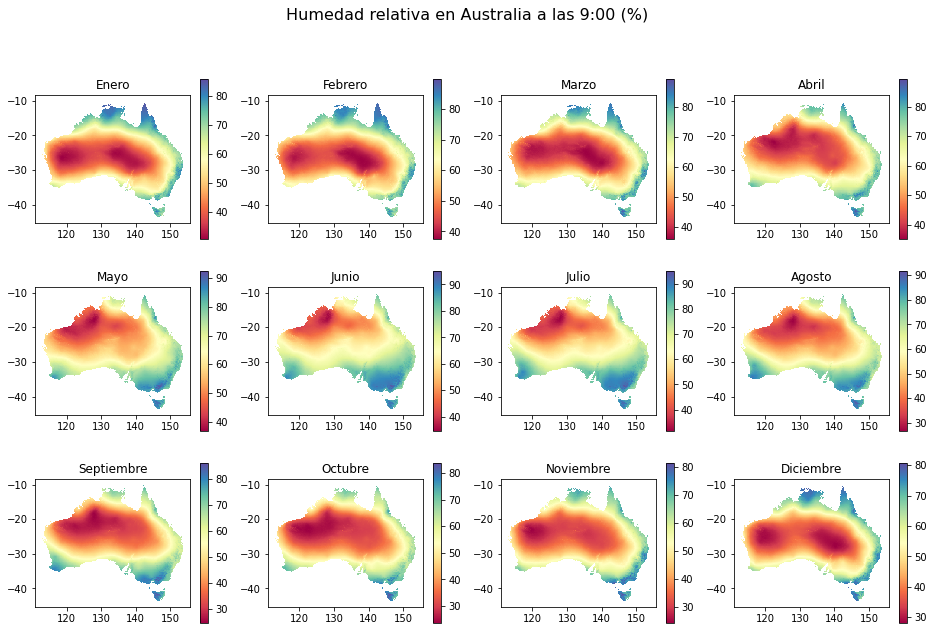

In [98]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Humedad relativa en Australia a las 9:00 (%)', fontsize=16)

df_clima.plot(column='rh9jan',ax=axes[0,0],cmap='Spectral', legend=True); axes[0,0].set_title('Enero')
df_clima.plot(column='rh9feb',ax=axes[0,1],cmap='Spectral', legend=True); axes[0,1].set_title('Febrero')
df_clima.plot(column='rh9mar',ax=axes[0,2],cmap='Spectral', legend=True); axes[0,2].set_title('Marzo')
df_clima.plot(column='rh9apr',ax=axes[0,3],cmap='Spectral', legend=True); axes[0,3].set_title('Abril')
df_clima.plot(column='rh9may',ax=axes[1,0],cmap='Spectral', legend=True); axes[1,0].set_title('Mayo')
df_clima.plot(column='rh9jun',ax=axes[1,1],cmap='Spectral', legend=True); axes[1,1].set_title('Junio')
df_clima.plot(column='rh9jul',ax=axes[1,2],cmap='Spectral', legend=True); axes[1,2].set_title('Julio')
df_clima.plot(column='rh9aug',ax=axes[1,3],cmap='Spectral', legend=True); axes[1,3].set_title('Agosto')
df_clima.plot(column='rh9sep',ax=axes[2,0],cmap='Spectral', legend=True); axes[2,0].set_title('Septiembre')
df_clima.plot(column='rh9oct',ax=axes[2,1],cmap='Spectral', legend=True); axes[2,1].set_title('Octubre')
df_clima.plot(column='rh9nov',ax=axes[2,2],cmap='Spectral', legend=True); axes[2,2].set_title('Noviembre')
df_clima.plot(column='rh9dec',ax=axes[2,3],cmap='Spectral', legend=True); axes[2,3].set_title('Diciembre')

Text(0.5, 1.0, 'Diciembre')

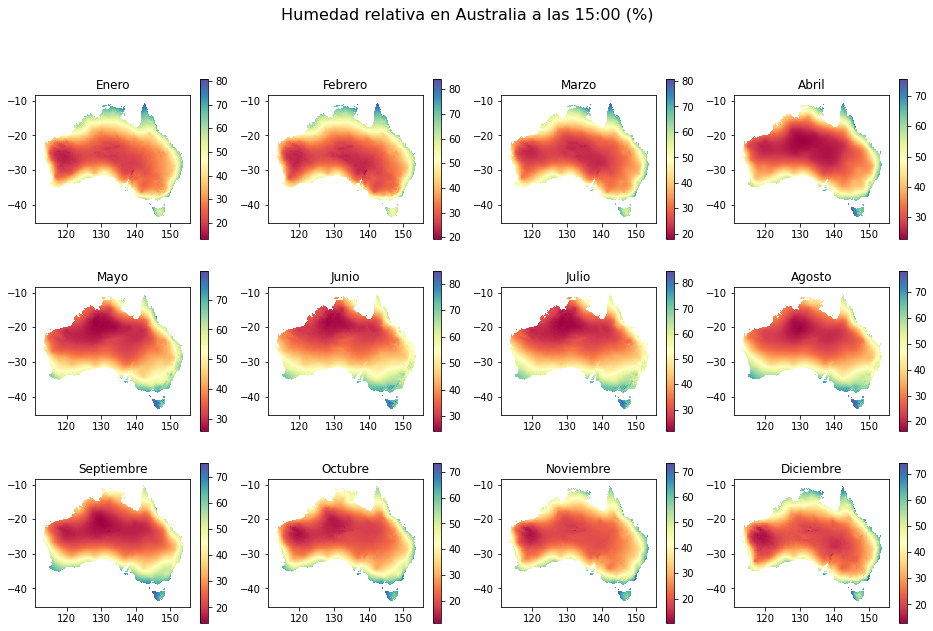

In [99]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Humedad relativa en Australia a las 15:00 (%)', fontsize=16)

df_clima.plot(column='rh15jan',ax=axes[0,0],cmap='Spectral', legend=True); axes[0,0].set_title('Enero')
df_clima.plot(column='rh15feb',ax=axes[0,1],cmap='Spectral', legend=True); axes[0,1].set_title('Febrero')
df_clima.plot(column='rh15mar',ax=axes[0,2],cmap='Spectral', legend=True); axes[0,2].set_title('Marzo')
df_clima.plot(column='rh15apr',ax=axes[0,3],cmap='Spectral', legend=True); axes[0,3].set_title('Abril')
df_clima.plot(column='rh15may',ax=axes[1,0],cmap='Spectral', legend=True); axes[1,0].set_title('Mayo')
df_clima.plot(column='rh15jun',ax=axes[1,1],cmap='Spectral', legend=True); axes[1,1].set_title('Junio')
df_clima.plot(column='rh15jul',ax=axes[1,2],cmap='Spectral', legend=True); axes[1,2].set_title('Julio')
df_clima.plot(column='rh15aug',ax=axes[1,3],cmap='Spectral', legend=True); axes[1,3].set_title('Agosto')
df_clima.plot(column='rh15sep',ax=axes[2,0],cmap='Spectral', legend=True); axes[2,0].set_title('Septiembre')
df_clima.plot(column='rh15oct',ax=axes[2,1],cmap='Spectral', legend=True); axes[2,1].set_title('Octubre')
df_clima.plot(column='rh15nov',ax=axes[2,2],cmap='Spectral', legend=True); axes[2,2].set_title('Noviembre')
df_clima.plot(column='rh15dec',ax=axes[2,3],cmap='Spectral', legend=True); axes[2,3].set_title('Diciembre')

### Guardado de datos

In [95]:
df_clima.drop(columns=['centroids']).to_file(path_shape_data_temp)

### IMPORT: Índice UV

In [100]:
df_clima['uvjan'] = add_data(path_ind_UV,'uvjan',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvfeb'] = add_data(path_ind_UV,'uvfeb',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvmar'] = add_data(path_ind_UV,'uvmar',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvapr'] = add_data(path_ind_UV,'uvapr',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvmay'] = add_data(path_ind_UV,'uvmay',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvjun'] = add_data(path_ind_UV,'uvjun',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvjul'] = add_data(path_ind_UV,'uvjul',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvaug'] = add_data(path_ind_UV,'uvaug',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvsep'] = add_data(path_ind_UV,'uvsep',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvoct'] = add_data(path_ind_UV,'uvoct',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvnov'] = add_data(path_ind_UV,'uvnov',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')
df_clima['uvdec'] = add_data(path_ind_UV,'uvdec',110.25, -51.42, 1.5, df_clima.centroids).fillna(method='ffill')

 100% 

 100% 0% 

 100% 

 100% 8%  

 100% 0% 

 100% 0%  42% 69% 84% 

 100% 

 100% 6% 

 100% 0% 

 100% 4% 96% 

 100% 

 100% 



Text(0.5, 1.0, 'Diciembre')

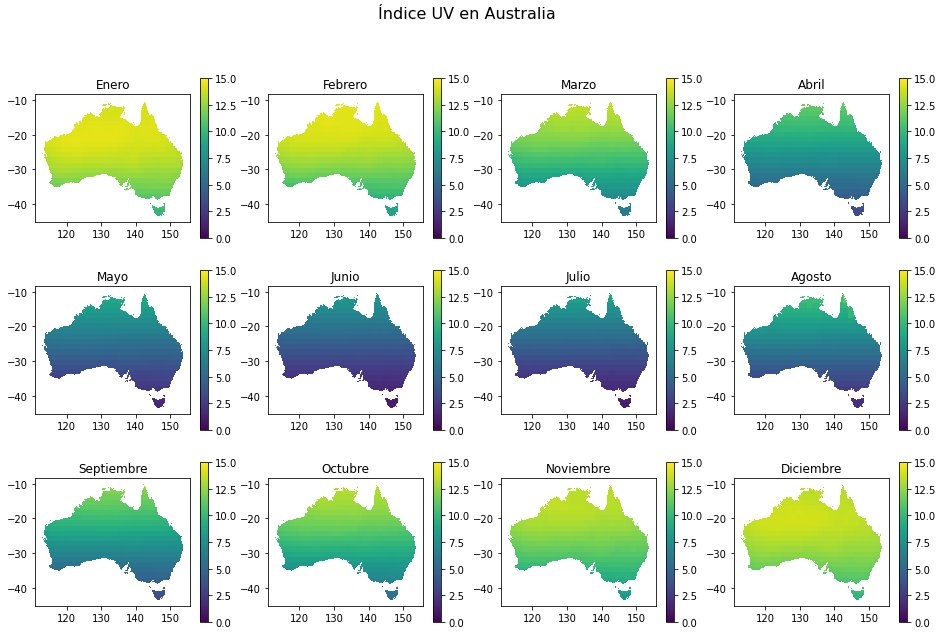

In [103]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Índice UV en Australia', fontsize=16)

df_clima.plot(column='uvjan',ax=axes[0,0],cmap='viridis', legend=True, vmin=0, vmax=15); axes[0,0].set_title('Enero')
df_clima.plot(column='uvfeb',ax=axes[0,1],cmap='viridis', legend=True, vmin=0, vmax=15); axes[0,1].set_title('Febrero')
df_clima.plot(column='uvmar',ax=axes[0,2],cmap='viridis', legend=True, vmin=0, vmax=15); axes[0,2].set_title('Marzo')
df_clima.plot(column='uvapr',ax=axes[0,3],cmap='viridis', legend=True, vmin=0, vmax=15); axes[0,3].set_title('Abril')
df_clima.plot(column='uvmay',ax=axes[1,0],cmap='viridis', legend=True, vmin=0, vmax=15); axes[1,0].set_title('Mayo')
df_clima.plot(column='uvjun',ax=axes[1,1],cmap='viridis', legend=True, vmin=0, vmax=15); axes[1,1].set_title('Junio')
df_clima.plot(column='uvjul',ax=axes[1,2],cmap='viridis', legend=True, vmin=0, vmax=15); axes[1,2].set_title('Julio')
df_clima.plot(column='uvaug',ax=axes[1,3],cmap='viridis', legend=True, vmin=0, vmax=15); axes[1,3].set_title('Agosto')
df_clima.plot(column='uvsep',ax=axes[2,0],cmap='viridis', legend=True, vmin=0, vmax=15); axes[2,0].set_title('Septiembre')
df_clima.plot(column='uvoct',ax=axes[2,1],cmap='viridis', legend=True, vmin=0, vmax=15); axes[2,1].set_title('Octubre')
df_clima.plot(column='uvnov',ax=axes[2,2],cmap='viridis', legend=True, vmin=0, vmax=15); axes[2,2].set_title('Noviembre')
df_clima.plot(column='uvdec',ax=axes[2,3],cmap='viridis', legend=True, vmin=0, vmax=15); axes[2,3].set_title('Diciembre')

### IMPORT: Lluvia en mm

In [113]:
df_clima['rainjan'] = add_data(path_lluvia,'rainjan',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainfeb'] = add_data(path_lluvia,'rainfeb',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainmar'] = add_data(path_lluvia,'rainmar',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainapr'] = add_data(path_lluvia,'rainapr',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainmay'] = add_data(path_lluvia,'rainmay',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainjun'] = add_data(path_lluvia,'rainjun',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainjul'] = add_data(path_lluvia,'rainjul',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainaug'] = add_data(path_lluvia,'rainaug',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainsep'] = add_data(path_lluvia,'rainsep',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainoct'] = add_data(path_lluvia,'rainoct',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['rainnov'] = add_data(path_lluvia,'rainnov',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')
df_clima['raindec'] = add_data(path_lluvia,'raindec',112, -44.5, 0.05, df_clima.centroids).fillna(method='ffill')

 100% 

 100%  80% 

 100% 1% 

 100%  

 100% 3% 64% 86% 

 100% 4% 77% 

 100% 3% 44% 

 100% 

 100%  

 100% %  45% 54% 88% 

 100% 

 100% 3% 



Text(0.5, 1.0, 'Diciembre')

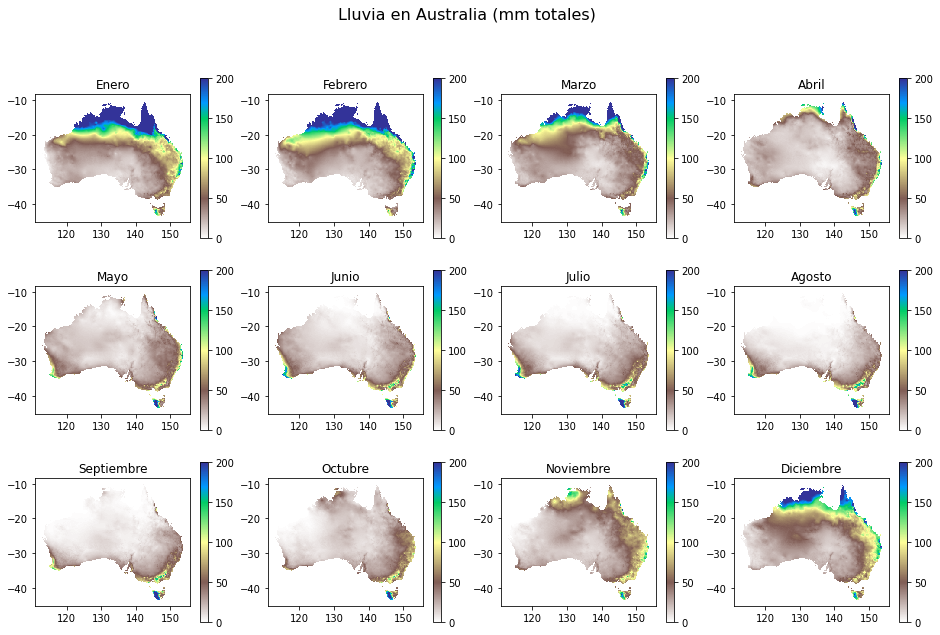

In [119]:
fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(16,10))

fig.suptitle('Lluvia en Australia (mm totales)', fontsize=16)

df_clima.plot(column='rainjan',ax=axes[0,0],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[0,0].set_title('Enero')
df_clima.plot(column='rainfeb',ax=axes[0,1],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[0,1].set_title('Febrero')
df_clima.plot(column='rainmar',ax=axes[0,2],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[0,2].set_title('Marzo')
df_clima.plot(column='rainapr',ax=axes[0,3],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[0,3].set_title('Abril')
df_clima.plot(column='rainmay',ax=axes[1,0],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[1,0].set_title('Mayo')
df_clima.plot(column='rainjun',ax=axes[1,1],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[1,1].set_title('Junio')
df_clima.plot(column='rainjul',ax=axes[1,2],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[1,2].set_title('Julio')
df_clima.plot(column='rainaug',ax=axes[1,3],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[1,3].set_title('Agosto')
df_clima.plot(column='rainsep',ax=axes[2,0],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[2,0].set_title('Septiembre')
df_clima.plot(column='rainoct',ax=axes[2,1],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[2,1].set_title('Octubre')
df_clima.plot(column='rainnov',ax=axes[2,2],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[2,2].set_title('Noviembre')
df_clima.plot(column='raindec',ax=axes[2,3],cmap='terrain_r', legend=True,vmin=0,vmax=200); axes[2,3].set_title('Diciembre')

In [123]:
df_clima.insert(0, 'lon', df_clima.centroids.x)
df_clima.insert(1, 'lat', df_clima.centroids.y)
df_clima.index.name='id'

## Guardado como CSV y GeoPackage

In [131]:
# CSV
df_clima.drop(columns=['geometry','centroids']).to_csv(path_csv_data_final)

In [132]:
# GPKG
df_clima.drop(columns=['centroids']).to_file(path_shape_data_final)